<a href="https://colab.research.google.com/github/feomedeirosdev/ml-courseira/blob/main/003_regressap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import scipy.stats as stats

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CursoIA/3.Algoritmos de Machine Learning/mt_cars.csv')
print(df.columns.tolist())
print(df.shape)

['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
(32, 12)


In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(df.columns.tolist())
print(df.shape)

['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
(32, 11)


<Axes: >

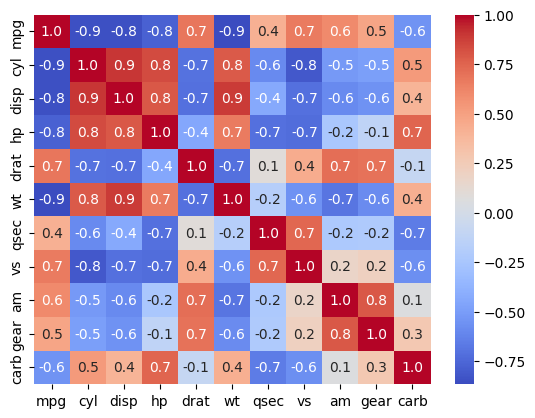

In [ ]:
corr = df.corr()
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.1f')

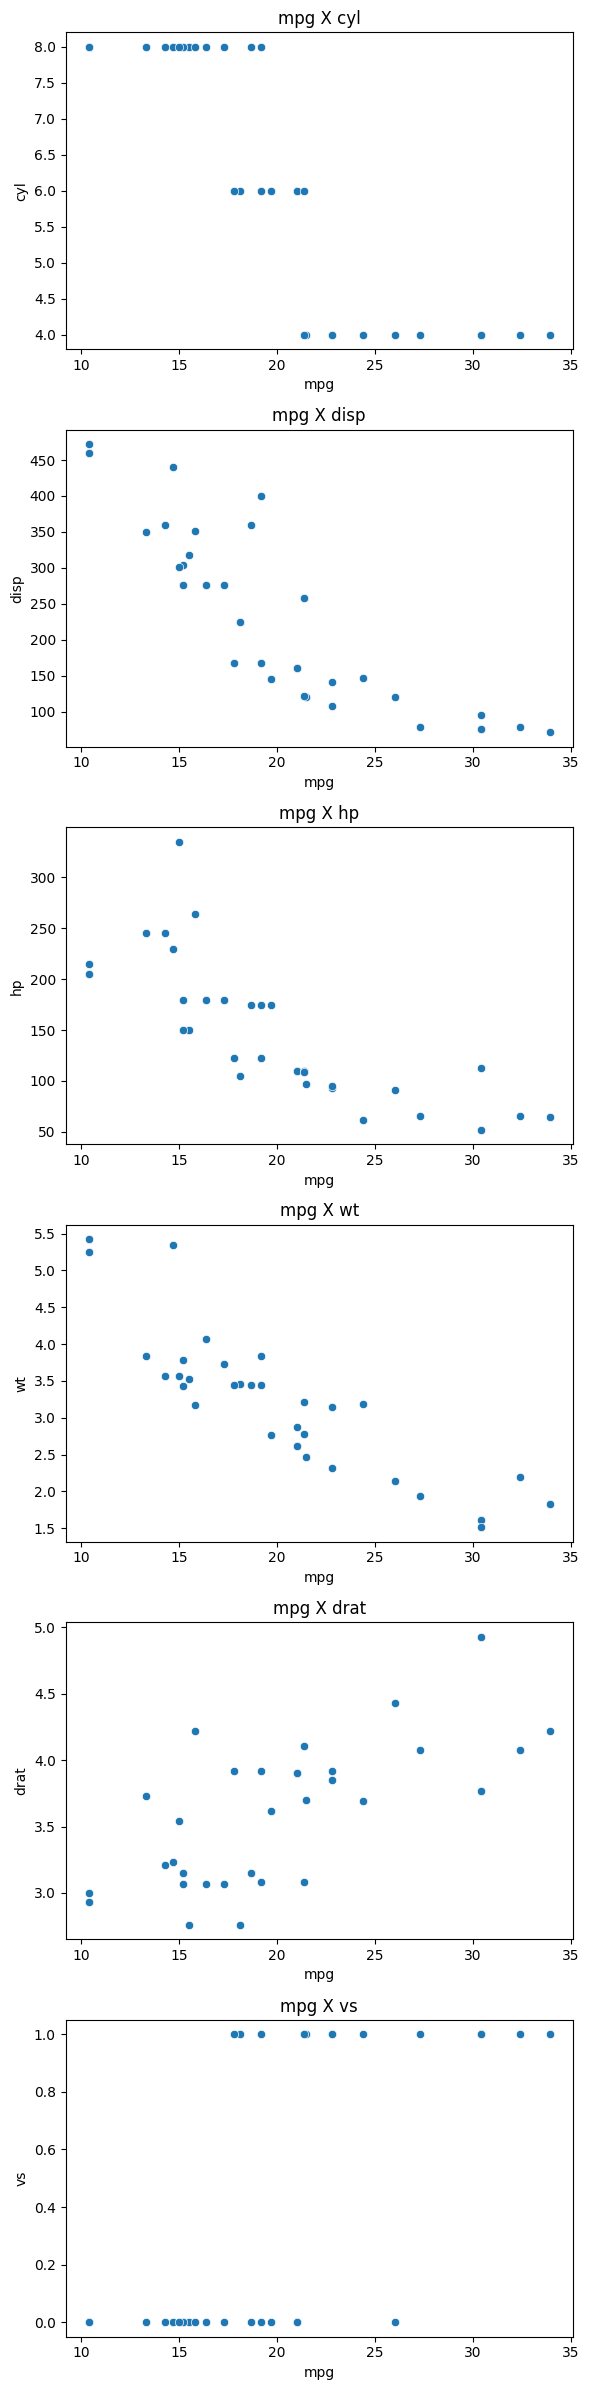

In [ ]:
column_pairs = [('mpg','cyl'), ('mpg','disp'), ('mpg','hp'), ('mpg','wt'), ('mpg','drat'), ('mpg','vs')]
n_plots = len(column_pairs)
fig, axes = plt.subplots(nrows=n_plots, ncols=1, figsize=(6, 4*n_plots))

for i, pair in enumerate(column_pairs):
    x_col, y_col = pair
    sns.scatterplot(
        x = x_col,
        y = y_col,
        data = df,
        ax=axes[i]
        )
    axes[i].set_title(f'{x_col} X {y_col}')

plt.tight_layout()
plt.show()

In [ ]:
# modelo = sm.ols(formula =  'mpg ~ wt + disp + hp', data = df)
# AIC: 156.6 - BIC: 162.5 - SW: 0.927 - p-v: 0.033

# modelo = sm.ols(formula =  'mpg ~ disp + cyl', data = df)
# AIC: 165.1 - BIC: 169.5 - SW: 0.942 - p-v: 0.085

modelo = sm.ols(formula =  'mpg ~ drat + vs', data = df)
# AIC: 179.1 - BIC: 183.5 - SW: 0.981 - p-v: 0.822

modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           5.82e-07
Time:                        16:35:48   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.7

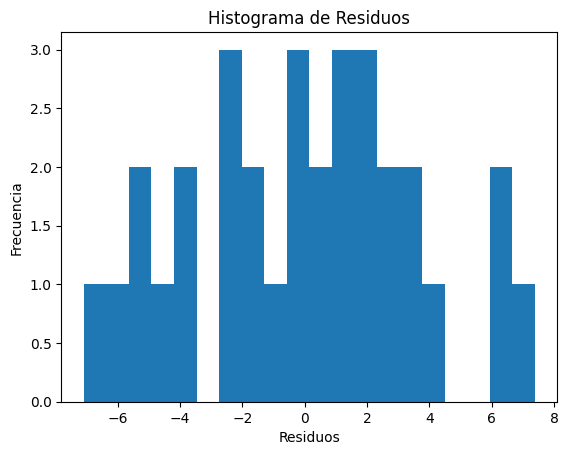

In [ ]:
residuos = modelo.resid
plt.hist(residuos, bins=20)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

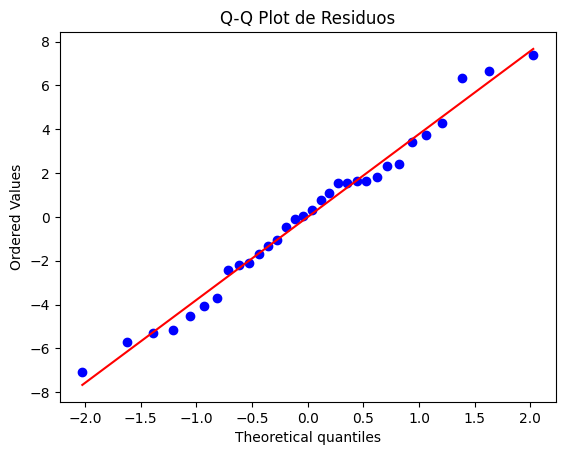

In [ ]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.title('Q-Q Plot de Residuos')
plt.show()

In [ ]:
# h0: Dados normalmentes distribuídos
# p <= 0.05 -> resejito da hipótese nula (os dados não etão normalmente distribuidos)
# p > 0.05  -> não é possível rejeitar aho

stat, pval = stats.shapiro(residuos)
print(f'Shapiro-Wilk: {stat:.3f}')
print(f'p-value: {pval:.3f}')

Shapiro-Wilk: 0.981
p-value: 0.822
